Given the issues we saw with the confidence interval for binomial using Wald and Fisher information, let's look at the [logit or log-odds transformed version](https://onlinecourses.science.psu.edu/stat504/node/38 "Stat 504 Notes").  We begin the same way.

In [333]:
trials<-1000
n<-100
p<-0.1 # make this smaller to see the CI % get farther off
#rbinom(100,100,.2) draws from Bin(n,p) ten times
x<-rbinom(trials,n,p)

And the vector of maximum likelihood estimators is constructed in the same way.

In [334]:
phat = x/n 

The difference is that now we are going to look at the variance of the maximum likelihood estimator as a random variable in a different coordinate system (a nonlinear change of coordinates).  This eliminates the hard bondaries at 0 and 1.  The transformation we will use is called the logit or log-odds transform. 

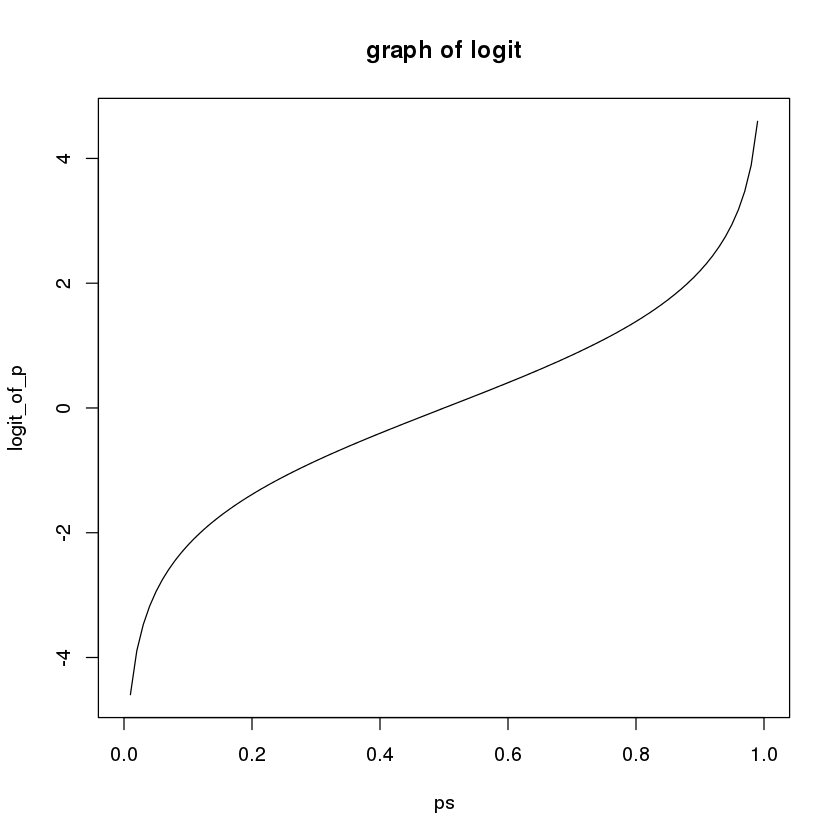

In [335]:
ps = seq(from=0,to=1,by=.01)
logit_of_p = log(ps/(1-ps))
plot(ps,logit_of_p, type='l')
title("graph of logit")

Applying this transformation, lets define 
$$\hat{\phi} = \log \frac{\hat{p}}{1-\hat{p}}$$

In [336]:
phihat = log (phat/(1-phat)) #vector of estimates
phi  = log (p/(1-p)) # true value
phi

[1] -2.197225

And now proceed as before in confidence interval construction, obtaining a vector of Fisher informations.  The wrinkle is that we need to adjust our formula for the Fisher information using a little calculus.  We have 
$$I(\hat{\phi})=\dfrac{I(\hat{p})}{[\phi'(\hat{p})]^2}, \;\;\text{and}$$
$$\phi'(\hat{p}) = \frac{1}{\hat{p}(1-\hat{p})}.$$
So the Fisher information is computed from $\hat{\phi}$ as follows.

In [337]:
phi_prime = 1/(phat*(1-phat))
FI_of_p = n/(phat*(1-phat))
FI = FI_of_p / (phi_prime^2)

In [338]:
varhat = 1/FI # the vector of estimated variances for the transformed mle, in phi-coordinates

In [339]:
#varhat

Now we compute the vectors of lower and upper bounds of our confidence intervals, this time *in the* $\phi$ *coordinate:*

In [340]:
lower = phihat - 1.96*sqrt(varhat)

In [341]:
upper = phihat + 1.96*sqrt(varhat)

If this is a good CI, the next number should converge to .95 as trials $\rightarrow \infty$

In [342]:
outcome = lower< phi & phi<upper
outcome[is.na(outcome)]=FALSE # NAs happen when phat = 0, so the CI is degenerate and doesn't contain the true value
sum(outcome)/trials 

[1] 0.95

In [343]:
meta = 10000
metatrials = rep(0,meta);
for(i in 0:meta)
{
  x<-rbinom(trials,n,p);       # vector of outcomes
  phat = x/n;                  # vector of mles
  phihat = log (phat/(1-phat)) # vector of estimates
  phi  = log (p/(1-p))         # true value in phi coordinates (scalar)
    #Fisher information calculation
  phi_prime = 1/(phat*(1-phat))
  FI_of_p = n/(phat*(1-phat))
  FI = FI_of_p / (phi_prime^2)
   
  varhat = 1/FI;
  lower = phihat - 1.96*sqrt(varhat);
  upper = phihat + 1.96*sqrt(varhat);
  outcome = lower< phi & phi<upper
  outcome[is.na(outcome)]=FALSE # NAs happen when phat = 0, so the CI is degenerate and doesn't contain the true value
  inthere = sum(outcome)/trials 
  metatrials[i]=inthere;
}

In [344]:
#metatrials

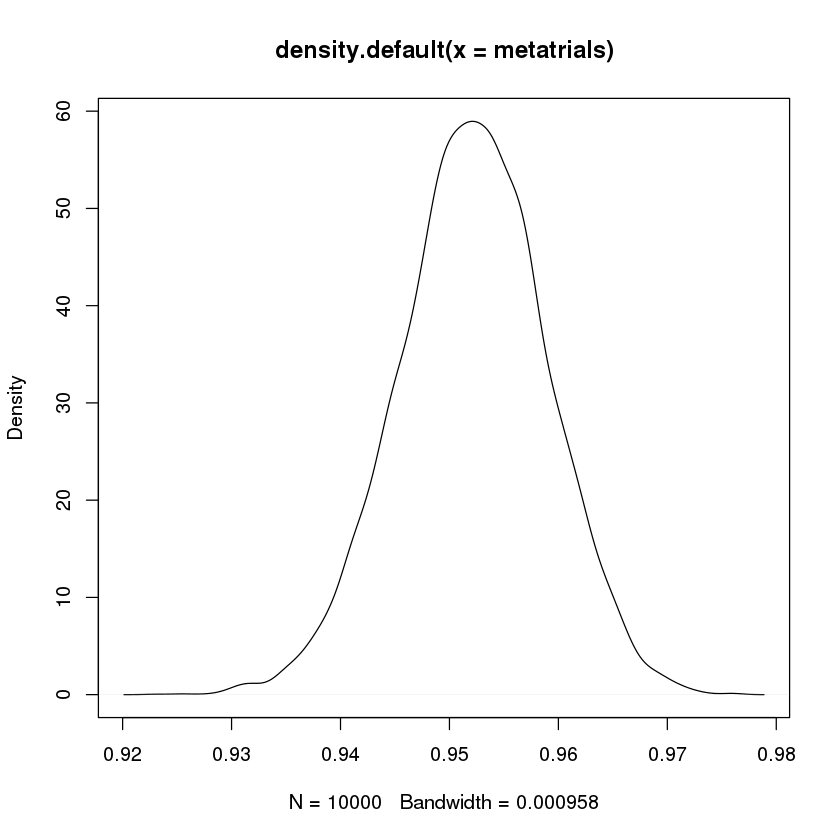

In [345]:
plot(density(metatrials)) 

This gives better performance for our 95% CI.